# Import libraries

In [67]:
import pandas as pd
import numpy as np 
import datetime
import time
import sys
from scipy import stats
from statsmodels.stats import stattools

# Include py file

In [81]:
# !rmdir /s /q RiskLabAI.py
!git clone https://github.com/RiskLabAI/RiskLabAI.py.git

Cloning into 'RiskLabAI.py'...


In [82]:
import sys
sys.path.append('./RiskLabAI')
from RiskLabAI.data.structures import *

In [83]:
import RiskLabAI as risklab
# from RiskLabAI import *

# Import Tick data

In [58]:
dir = "https://raw.githubusercontent.com/risk-labratory/data/main/"
url = dir + "IVE_2020.csv"
dataframe = pd.read_csv(url, header = 0)
dataframe['dates'] = pd.to_datetime(dataframe['dates'])
dataframe.set_index('dates', inplace = True, drop = True)
dataframe.drop_duplicates(inplace = True)
dataframe = dataframe[(dataframe.index.hour >= 9) & (dataframe.index.hour<16)]
dataframe.head()

,price,bid,ask,size
dates,,,,
2020-01-02 09:30:00,130.68,130.59,130.60,20625
2020-01-02 09:30:01,130.50,130.50,130.77,200
2020-01-02 09:30:04,130.53,130.52,130.78,100
2020-01-02 09:30:04,130.55,130.52,130.78,100
2020-01-02 09:30:04,130.53,130.52,130.78,200


In [84]:
ohlcvTime = generate_time_bar_dataframe(dataframe, frequency = "30Min")
ohlcvTime.head(10)

TypeError: 'module' object is not callable

In [50]:
timeBarLen = ohlcvTime.shape[0]
ohlcvTick = generate_tick_bar_dataframe(dataframe, tickPerBar = None, numberBars = timeBarLen)
ohlcvTick.head(10)

NameError: name 'ohlcvTime' is not defined

In [51]:
ohlcvVolume = generate_volume_bar_dataframe(dataframe, volumePerBar = None, numberBars = timeBarLen)
ohlcvVolume.head(10)

NameError: name 'generate_volume_bar_dataframe' is not defined

In [7]:
ohlcvDollar = dollarBar(dataframe, dollarPerBar = None, numberBars = timeBarLen)
ohlcvDollar.head(10)

,open,high,low,close,volume,ValueOfTrades,PriceMean,TickCount,PriceMeanLogReturn
dates,,,,,,,,,
2020-01-02 09:30:00,130.6800,130.78,130.5000,130.67,24225,130.674262,130.631500,20,NaN
2020-01-02 09:30:05,130.6700,130.78,130.5200,130.52,4846,130.669480,130.660000,4,0.000218
2020-01-02 09:30:12,130.5200,130.74,130.5200,130.59,7182,130.604879,130.629840,35,-0.000231
2020-01-02 09:32:50,130.5700,130.59,130.5567,130.59,6121,130.575292,130.575780,15,-0.000414
2020-01-02 09:33:04,130.6100,130.61,130.5900,130.61,6100,130.599180,130.600769,13,0.000191
2020-01-02 09:33:19,130.6100,130.62,130.6100,130.62,300,130.613333,130.615000,2,0.000109
2020-01-02 09:33:22,130.6100,130.63,130.6100,130.63,48100,130.610042,130.620000,2,0.000038
2020-01-02 09:33:23,130.6300,130.67,130.5350,130.55,5832,130.602522,130.611625,20,-0.000064
2020-01-02 09:35:05,130.5500,130.62,130.4800,130.55,5465,130.545136,130.553600,23,-0.000444


<AxesSubplot:xlabel='dates'>

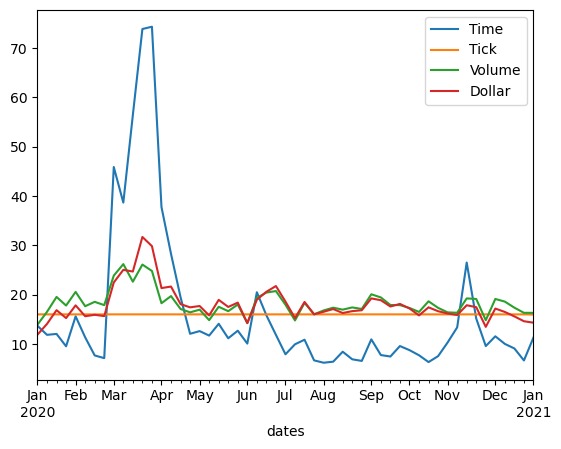

In [8]:
countAverage = pd.DataFrame()
countAverage['Time'] = ohlcvTime.resample("1W")['TickCount'].mean()
countAverage['Tick'] = ohlcvTick.resample("1W")['TickCount'].mean()
countAverage['Volume'] = ohlcvVolume.resample("1W")['TickCount'].mean()
countAverage['Dollar'] = ohlcvDollar.resample("1W")['TickCount'].mean()
countAverage

In [13]:
countAverage

,Time,Tick,Volume,Dollar
dates,,,,
2020-01-05,13.676301,16.000000,13.917647,11.889447
2020-01-12,11.848214,16.000000,16.518672,14.067138
2020-01-19,12.035714,16.000000,19.536232,16.850000
2020-01-26,9.526786,16.000000,17.788889,15.247619
2020-02-02,15.601190,16.000000,20.552941,17.826531
2020-02-09,11.348214,16.000000,17.652778,15.627049
2020-02-16,7.669643,16.000000,18.539568,15.907407
2020-02-23,7.125000,16.000000,17.873134,15.653595
2020-03-01,45.872024,16.000000,23.860681,22.469388


In [15]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.Time, name='Time',))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.Tick, name='Tick',))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.Volume, name='Volume',))
fig.add_trace(go.Scatter(x=countAverage.index, y=countAverage.Dollar, name='Dollar',))


fig.update_layout(
    title="Bagging Classifier Accuracy (function of p and N)",
    xaxis_title="p (The accuracy of a classifier is the probability p of labeling a prediction as 1)",
    yaxis_title="N (The number of independent classifers)",
    template="plotly_dark",
)
# Edit the layout
fig.update_layout(title='Standard Bars Frequency',
                   xaxis_title='Date',
                   yaxis_title='Frequency')


fig.write_json('Standard Bars Frequency.json')

fig.show()

In [9]:
# Select a smaller range
startDate = datetime.datetime(2020, 3, 1)
endDate = datetime.datetime(2020, 3, 5)
dataframe2 = dataframe[((dataframe.index >= startDate) & (dataframe.index <= endDate))][['price', 'size']]
dataframe2.drop_duplicates()
dataframe2['ret'] = np.log(dataframe2['price']) - np.log(dataframe2['price'].shift(1))
dataframe2['label'] = np.sign(dataframe2['ret'])
dataframe2['volumelabeled'] = dataframe2['label']*dataframe2['size']
dataframe2['dollarslabeled'] = dataframe2['volumelabeled']*dataframe2['price']
dataframe2.dropna(inplace = True)
dataframe2.head()

,price,size,ret,label,volumelabeled,dollarslabeled
dates,,,,,,
2020-03-02 09:00:12,114.7000,123,0.000087,1.0,123.0,1.410810e+04
2020-03-02 09:30:00,115.2800,26670,0.005044,1.0,26670.0,3.074518e+06
2020-03-02 09:30:07,115.3400,100,0.000520,1.0,100.0,1.153400e+04
2020-03-02 09:30:16,115.2200,100,-0.001041,-1.0,-100.0,-1.152200e+04
2020-03-02 09:30:26,115.2637,172,0.000379,1.0,172.0,1.982536e+04


In [10]:
ohlcv_time = timeBar(dataframe2, frequency = "30Min")
ohlcv_tick = tickBar(dataframe2, tickPerBar = 1000, numberBars = None)
ohlcv_volume = volumeBar(dataframe2, volumePerBar = 10000, numberBars = None)
ohlcv_dollar = dollarBar(dataframe2, dollarPerBar = 500000, numberBars = None)

c:\Users\HP\OneDrive\RiskLab Code\2018-02 financial data structures\PY\DataStructures.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ohlc['ValueOfTrades'] = tickDataGrouped.apply(lambda x:(x['price']*x['size']).sum()/x['size'].sum()) # find value of trades


In [11]:
ohlcvinfo, thetasabsolute, thresholds = infoBar(dataframe2, type = "dollar", tickExpectedInit = 500)

Completed: [------------------->] 100% - 0 minutes remaining.